# Introduction

Attending to Colleg undoubtedly have an impact on people´s lives, <br>
also those people that went to college make an impact of their own <br>
on others persons, communities and workplace.

I want to know if going to college makes a difference in Baseball players, <br>
their teams and their income as professional players.<br>
These are the questions I want to answer with this analysis:

    1. On a yearly basis, does Baseball players who attended to college have greater income compared to those who didn't?

    2. Having College graduated player gives teams better chance to win World Series?

    3. Having more College graduated players makes teams more successful during the season?
    
### Independet Variable
 Players who attended to college
 
### Dependent Variables
    1. Income of players
    2. Chance of winning World Series
    3. Performance of the teams


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Loads important files for this analysis

filename = 'baseballdatabank-2017.1\core\Teams.csv'
teams_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Salaries.csv'
salaries_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Master.csv'
master_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\CollegePlaying.csv'
college_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Appearances.csv'
appearances_df = pd.read_csv(filename)


In [2]:
#In the master table get those players who went to college or not
went = college_df.playerID.unique()

#append the new column to the original dataFrame
master_df['went_to_college'] = master_df.playerID.isin(went)



In [3]:
#get players who attended to college and those who didn't
college_playing = master_df[master_df['went_to_college']]
non_college_playing = master_df[master_df['went_to_college']==False]


In [4]:
#now get the salaries of the players to describe and compare
#create an index dataFrame of the ssalaries table to splti the table
#no need to append this column to that table
salaries_df['went_to_college'] = salaries_df.playerID.isin(went)

college_player_salaries = salaries_df[salaries_df['went_to_college']]
non_college_player_salaries = salaries_df[salaries_df['went_to_college']==False]



In [5]:
#Salaries on year 2016
college_salaries2016 = college_player_salaries[college_player_salaries.yearID==2016]
non_college_salaries2016 =  non_college_player_salaries[non_college_player_salaries.yearID==2016]

#Salaries on year 2015
college_salaries2015 = college_player_salaries[college_player_salaries.yearID==2015]
non_college_salaries2015 =  non_college_player_salaries[non_college_player_salaries.yearID==2015]

#Salaries on year 2014
college_salaries2014 = college_player_salaries[college_player_salaries.yearID==2014]
non_college_salaries2014 =  non_college_player_salaries[non_college_player_salaries.yearID==2014]




In [6]:
def put_salaries_hist(row, col, df, axes, lbl,year):
    """
       Draws an histogram whit a line on the average, to depict the distribution
    of the salaries data, and prints lables and legends.
    
    """
    titlestr = '{}College Players, year {}'
    xlabel = '\nIncome x10 Million Dollars\n\n'
    
    #plt.title('Left Title', loc='left')
    axes[ax,col].title.set_text(titlestr.format(lbl, year))
    
    axes[ax,col].set_ylabel('Count')
    
    #divide the average salalry in the data between 1 million
    meanmd = df.salary.values.mean() /1000000
    axes[ax,col].set_xlabel(xlabel)
    
    #put the histogram
    axes[ax,col].hist(df.salary.values)
    
    #draw a line for the average of the group
    axes[ax,col].axvline(df.salary.values.mean(), color='c', linestyle='dashed', 
                         linewidth=2, label='Avg ${0:.2f} MD'.format(meanmd))

    #show legends
    legend = axes[ax,col].legend(loc='upper center', shadow=True)
    
    

Populating the interactive namespace from numpy and matplotlib


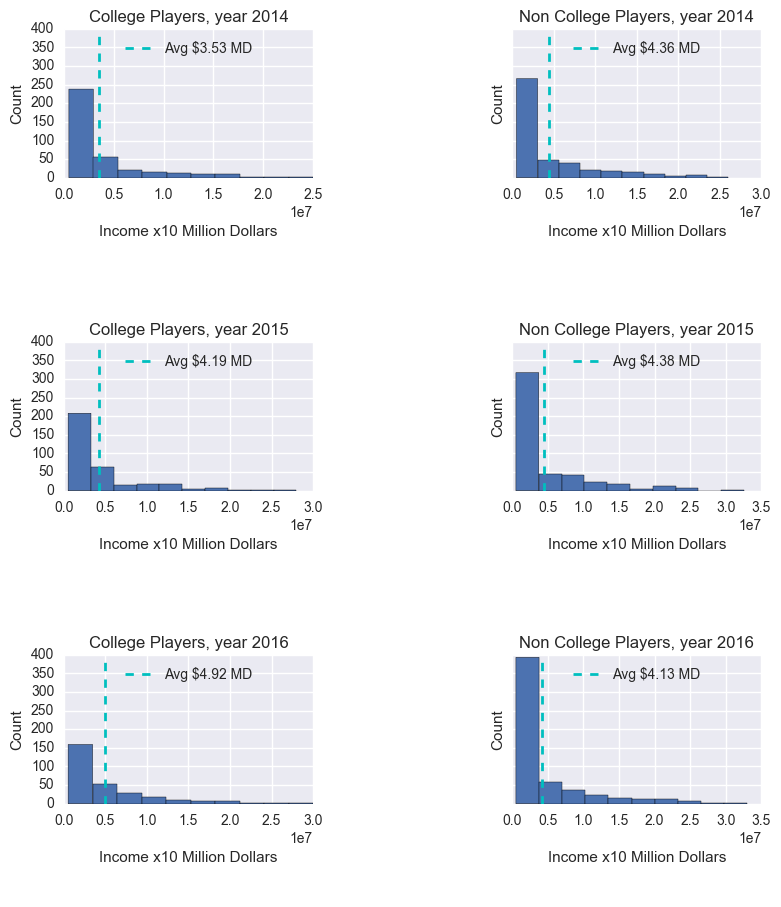

In [7]:
%pylab inline

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 10), sharey=True,sharex=False,edgecolor='k')

#put the resulting DataFrames into lists to easily get the charts
ylist = ['2014','2015','2016']
alist = [college_salaries2014 , college_salaries2015, college_salaries2016]
blist = [non_college_salaries2014 , non_college_salaries2015, non_college_salaries2016]
#row counter 
ax = 0

#string to put label on each chart

for ax in range( len(alist)):
    #the figure has 2 columns, the column on the left has the colleger players data
    # the column on the right has the non college players data 
    year = ylist[ax]
    
    #college players salaries
    adf = alist[ax]
    put_salaries_hist(ax,0,adf,axes,'',year)
    
    #non college players salaries
    adf = blist[ax]
    put_salaries_hist(ax,1,adf,axes,'Non ',year)

    ax = ax + 1


fig.subplots_adjust(hspace = 1.1,wspace=0.8)

### At first glance
In the above graphics, we can see an increase in the average income,<br>
of the group of player who attended to college, but in that same window of time,<br>
those players who did not attend college had a better average income at first<br> 
and then in the year 2016, college players were better paid.

Another thing to notice is that in the group of players that did not attend to college<br>
there are considerably more players with income of fewer than 5 million dollars.

### What is the real tendency?
Let's find out plotting the mean for both groups over the years. Unfortunately, <br>
we can only plot this since the first year salaries were recorded.

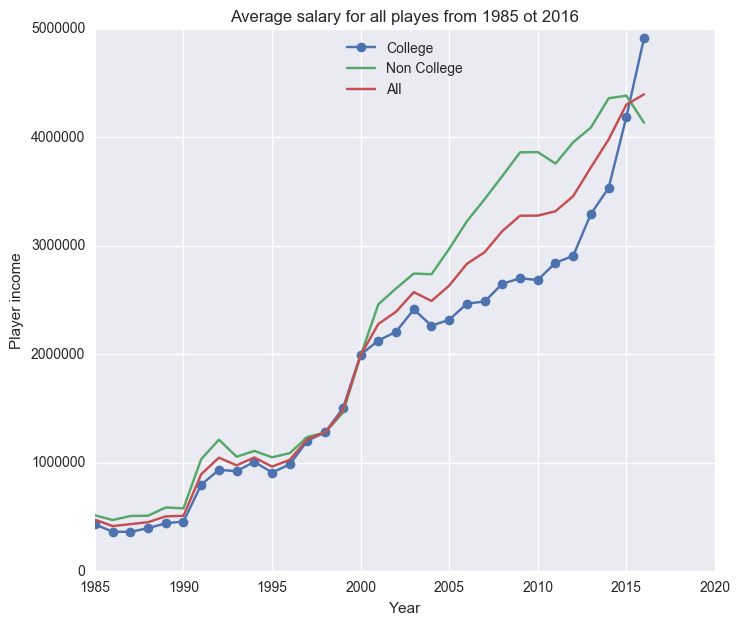

In [9]:
#get the avegare salary by year

#year average wages for college player
clgmeans  = college_player_salaries.groupby('yearID').salary.mean()

#year average wages for non college player
nclgmeans = non_college_player_salaries.groupby('yearID').salary.mean()

#year average wages for all player
allmean   =  salaries_df.groupby('yearID').salary.mean()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7), sharex=False)

#Draw a plot chart to contain the three results
axes.title.set_text('Average salary for all playes from 1985 ot 2016')
axes.plot(clgmeans,label='College', marker='o')
axes.plot(nclgmeans, label='Non College')
axes.plot(allmean, label='All', marker='+')
axes.set_xlabel('Year')
axes.set_ylabel('Player income')

legend = axes.legend(loc='upper center', shadow=True)

# 1. On a yearly basis, does Baseball players who attended to college have greater income compared to those who didn't?
<br>
## Means income Results
The line in green represents players who did not attend college. <br>
The blue line with dots is mean income of players who attended college.<br>
The red line is the average income of all players.

Apparently going to college may not guaranty a better income,<br> 
until recent years those trends have been switching.

But something may be wrong with this analysis, <br>
I have not taken into account the effect of the outliers and the size of the groups. 

# In conclusion

I cannot gurantee that attending to college may give players a better chance to get a greater income.

===================================================================================================================

# Having college player give teams better chance to win the World Series?

Now it is time to find out if those teams with more college players <br>
have won more World Series compared to those with fewer or no college players

In [10]:

def count_college_players(row):
    """
       Counts the number of college players a team has had every year, 
    only counts player who attended college on, or before the year of 
    each record. This function is designed to be used with a DataFram.apply call
    works on values of a row and returns the count of players
    
    args:
        row a row of the master_df Dataframe
        
    return:
        the count of college players for a team on one year
    
    """
    
    teamID = row['teamID']
    yearID = row['yearID']
    
    #from the appearances table het the player from each team that year
    yrteampls = appearances_df[appearances_df['yearID']==yearID]
    yrteampls = yrteampls[ yrteampls['teamID']==teamID]
    
    #now get the players that went to college on, or before that year
    clgplyr = college_df[college_df['yearID']<=yearID]
    
    #merge the filtered appearances and college table
    merged = yrteampls.merge(clgplyr,
                               on=['playerID'],
                               how='inner')
    
    #by counting the number of resulting records of the merging
    #we can know how many college player had that team on that year
    count = len(merged)
    
    return count


In [11]:
#count the number of college players each team had each year
teams_df['college_player_count'] = teams_df.apply(count_college_players,axis=1)

#get two groups, winners of World Series and Non winners
winnners_clg_plyrs = teams_df[teams_df.WSWin=='Y']
not_winnners_clg_plyrs = teams_df[teams_df.WSWin=='N']


In [12]:
def put_college_winners_scatter(col, axes, df, title):
    """
        Draws a scatter plots of the count of college player in the DataFrame
        
    args:
        col - Column of the subplot
        axes - Axes array of the matplotlib figure
        df - DataFre with the used data
    """
    
    axes[col].title.set_text(title)
    axes[col].scatter(df['yearID'].values,
      df['college_player_count'].values)
    
    axes[col].set_xlabel('Year')
    axes[col].set_ylabel('Number of college players')

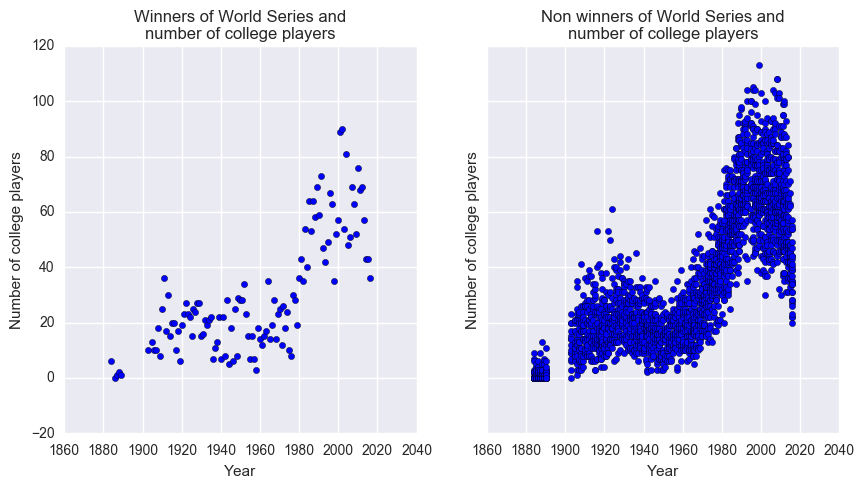

In [13]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True,sharex=False)

put_college_winners_scatter(0,axes,winnners_clg_plyrs,
                            'Winners of World Series and\nnumber of college players')

put_college_winners_scatter(1,axes,not_winnners_clg_plyrs,
                            'Non winners of World Series and\nnumber of college players')



# 2. Having College graduated player gives teams better chance to win World Series?

The comparison of both charts (winner of World Series at the left chart),<br> 
may tell us that having more college player does not appear to be an advantage. <br>
In the chart of the right (not winners by year), we appreciate a lot more college players<br>
compared to the winning teams.

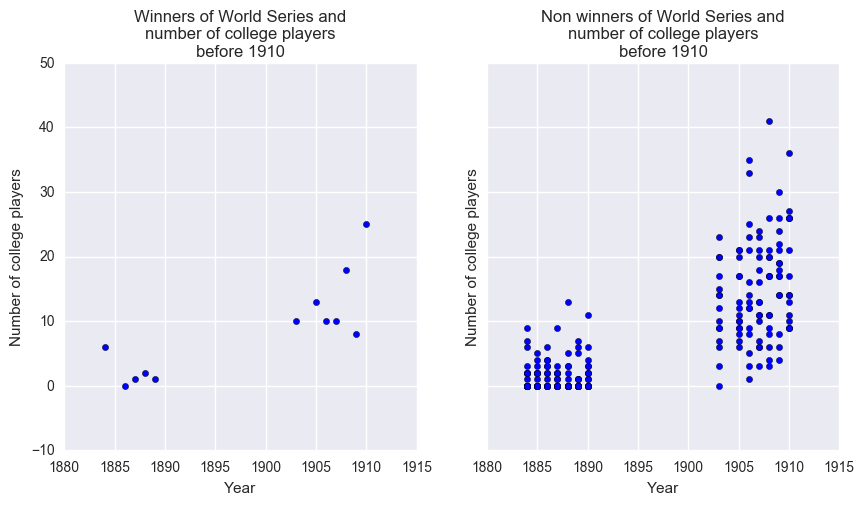

In [14]:
winnners_clg_plyrs_b1910 = winnners_clg_plyrs[winnners_clg_plyrs['yearID']<=1910]
not_winnners_clg_plyrs_b1910 = not_winnners_clg_plyrs[not_winnners_clg_plyrs['yearID']<=1910]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True,sharex=False)

put_college_winners_scatter(0,axes,winnners_clg_plyrs_b1910,
                            'Winners of World Series and\nnumber of college players\nbefore 1910')

put_college_winners_scatter(1,axes,not_winnners_clg_plyrs_b1910,
                           'Non winners of World Series and\nnumber of college players\nbefore 1910')



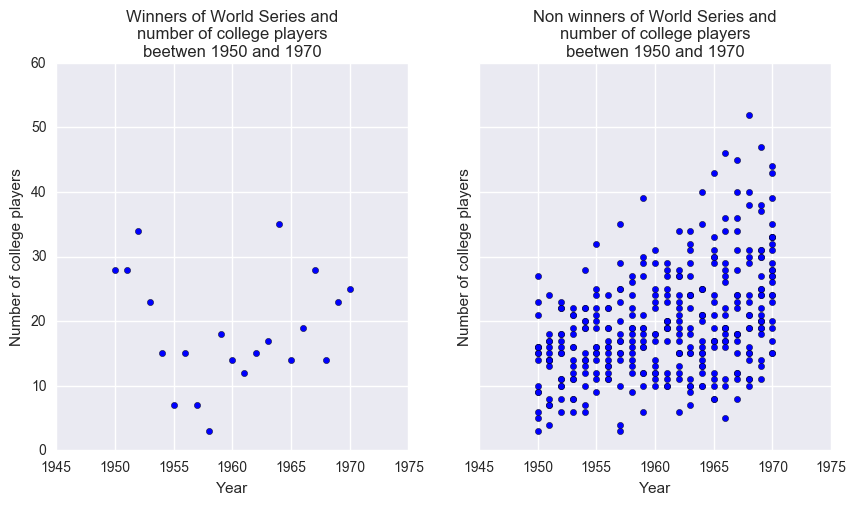

In [15]:
winnners_clg_plyrs_50_70 = winnners_clg_plyrs[winnners_clg_plyrs['yearID']>=1950]
winnners_clg_plyrs_50_70 = winnners_clg_plyrs_50_70[winnners_clg_plyrs_50_70['yearID']<=1970]

not_winnners_clg_plyrs_50_70 = not_winnners_clg_plyrs[not_winnners_clg_plyrs['yearID']>=1950]
not_winnners_clg_plyrs_50_70 = not_winnners_clg_plyrs_50_70[not_winnners_clg_plyrs_50_70['yearID']<=1970]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True,sharex=False)

put_college_winners_scatter(0,axes,winnners_clg_plyrs_50_70,
                           'Winners of World Series and\nnumber of college players\nbeetwen 1950 and 1970')

put_college_winners_scatter(1,axes,not_winnners_clg_plyrs_50_70,
                            'Non winners of World Series and\nnumber of college players\nbeetwen 1950 and 1970')



There are some interesting spots in the charts, there are gaps between <br>
1890 and 1904, approximately, also there are lapses with some decrease <br>
in the number of college players, most notably between 1950 and 1970. <br>
I assume this was caused by historical events like the great depression, <br>
World war I and the Vietnam War, in the latest large numbers of young men where deployed on war. 


=================================================================================================

# 3. Does having more College graduated players  makes teams more successful during the season?


By this I focus on the number of games won up to the split season, <br>
obviously excluding post season games. I want to discover if there is a<br>
correlation between the number of college players in each team and the number of won games.

In [16]:
#the teams_df now has a column with the count of college players

teams_df = teams_df.sort_values(by='yearID', ascending=False)



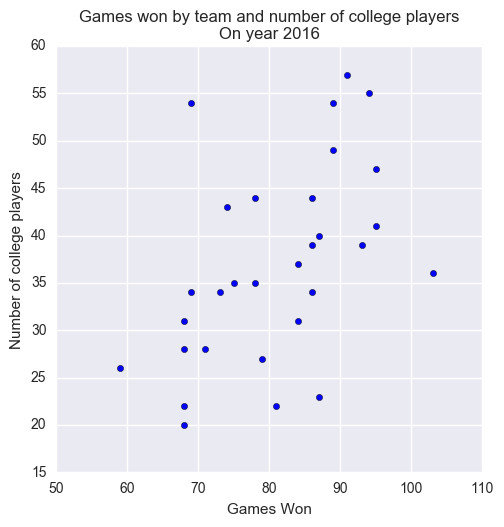

In [17]:

teams_clgplr2016 = teams_df[teams_df['yearID']==2016]


x = teams_clgplr2016.W.values
y = teams_clgplr2016.college_player_count.values


fig, axScatter = plt.subplots(figsize=(5.5, 5.5))
axScatter.title.set_text('Games won by team and number of college players\nOn year 2016')
axScatter.scatter(x,y,label='a label')
axScatter.set_xlabel('Games Won')
axScatter.set_ylabel('Number of college players')






In this case for year 2016, those teams with more college students <br>
hava won more games.
Lets find out how does it look for the last 20 years

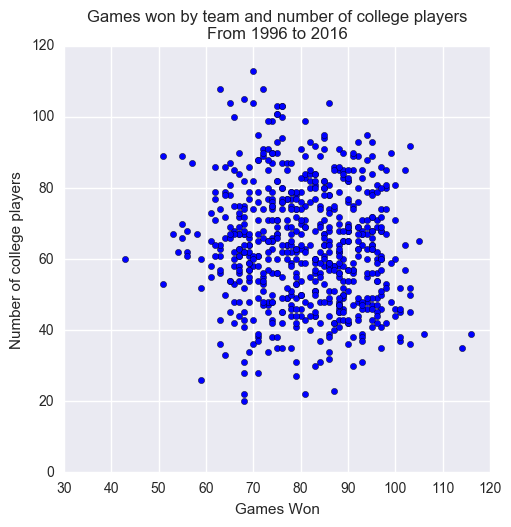

In [18]:

teams_clgplr20yrs = teams_df[teams_df['yearID']>=(2016-20)]

x = teams_clgplr20yrs.W.values
y = teams_clgplr20yrs.college_player_count.values

fig, axScatter = plt.subplots(figsize=(5.5, 5.5))
axScatter.title.set_text('Games won by team and number of college players\nFrom 1996 to 2016')
axScatter.scatter(x,y,label='a label')
axScatter.set_xlabel('Games Won')
axScatter.set_ylabel('Number of college players')


# Final Conclusion

At least from what can be appreciated in the scatter plot, <br>
not all the teams with more college players have better performance. <br>
Again from the last year, that tendency appears to be changing.

Independently of the results of these very simplistic analyses, <br>
playing in college is a major entry point to the major league, <br>
further analysis could demonstrate that some college graduated players <br>
are responsible for the change in the tendency of the results.

## Limitations of the analysis

A deep, consistent analysis may not be possible with all the data provided,<br>
for instance, is not possible to study the income of the players before 1985. 

Another issue is that inflation was not taken into account for the salaries section.


# Adjusting wages with CPI (consumer products index)

Using annual averages for CPI taken from <br>
http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/<br>
is possible to, roughly, convert salaries to today's values.<br>
<br>
Please note that for the present year 2017, I only use the average CPI

In [19]:
#load the CPI data
filename = 'cpi_1985_2017.csv'
cpi_df = pd.read_csv(filename)

def get_year_cpi(year):
    try:
        return cpi_df[cpi_df['yearID']==year].cpi.values[0]
    except:
        return 0

current_cpi =  get_year_cpi(2017)


def convert_wages(row):
    """ 
        This function convert salaries to today's values
    using the Customer Price Index
    """
    year = row['yearID']
    old_value = row['salary']
    
    old_cpi = get_year_cpi(year)
    
    today_value = ((old_value * (current_cpi/old_cpi)))
    
    
    
    return today_value

In [20]:

salaries_df['todays_salary'] = salaries_df.apply(convert_wages, axis=1)



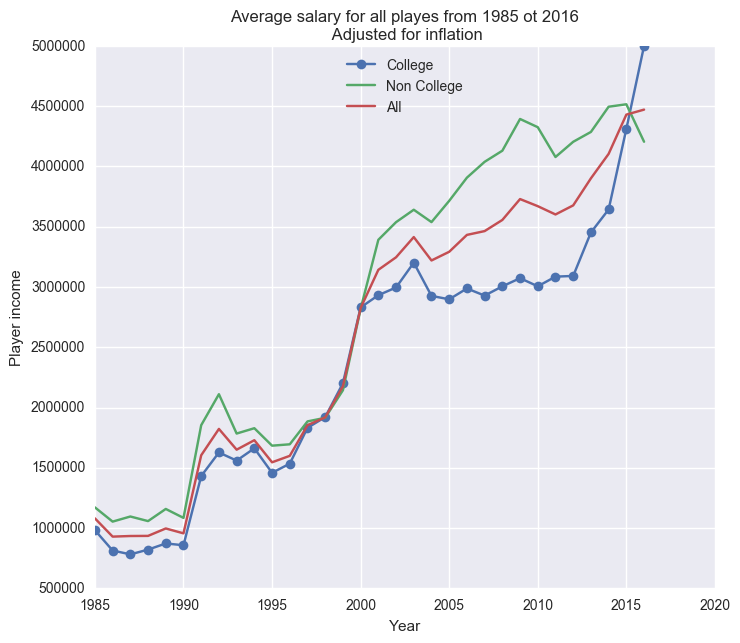

In [21]:


allmean_cpi_adj   =  salaries_df.groupby('yearID').todays_salary.mean()


clgmeans = salaries_df[salaries_df['went_to_college']].groupby('yearID').todays_salary.mean()
nclgmeans = salaries_df[salaries_df['went_to_college'] == False].groupby('yearID').todays_salary.mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 7), sharex=False)

#Draw a plot chart to contain the three results
axes.title.set_text('Average salary for all playes from 1985 ot 2016\n Adjusted for inflation')
axes.plot(clgmeans,label='College', marker='o')
axes.plot(nclgmeans, label='Non College')
axes.plot(allmean_cpi_adj, label='All', marker='+')
axes.set_xlabel('Year')
axes.set_ylabel('Player income')


legend = axes.legend(loc='upper center', shadow=True)

The chart has almos the same shape, but here, is more evident that<br>
arround 1998 and 2000, the salaries were very close, then they started<br> 
to split and finally on 2016 some just contributed to a switch in the dendency.



### References
http://www.usinflationcalculator.com/frequently-asked-questions-faqs/#HowInflationCalculatorWorks
http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/
https://stackoverflow.com/questions/45969828/combine-two-pandas-dataframe-into-one-new
https://stackoverflow.com/questions/12754584/matplotlib-two-datasets-on-one-image
https://pandas.pydata.org/pandas-docs/stable/index.html
https://matplotlib.org/2.0.2/users/examples_index.html



